# Orange Quality

## Anggota
**Mochamad Zidan Hadipratama - 5027221052**</br>
**Steven Figo - 5027221021**


## Requirement
- Panda
- Numpy
- MatPlotLib
- Seaborn
- Orange Quality Dataset(https://www.kaggle.com/datasets/shruthiiiee/orange-quality)

In [7]:
# Mengimpor pustaka yang diperlukan
import numpy as np  # Untuk operasi numerik
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk membuat grafik
import seaborn as sns  # Untuk visualisasi data statistik
from sklearn.preprocessing import LabelEncoder  # Untuk mengkodekan variabel kategori
from sklearn.preprocessing import MinMaxScaler  # Untuk penskalaan fitur min-max
from sklearn.preprocessing import StandardScaler  # Untuk standarisasi fitur
from sklearn.feature_selection import (
    RFE,
)  # Recursive Feature Elimination untuk pemilihan fitur
from sklearn.linear_model import LinearRegression  # Model regresi linear
from sklearn.impute import SimpleImputer  # Untuk mengisi nilai yang hilang
from sklearn.decomposition import (
    PCA,
)  # Principal Component Analysis untuk reduksi dimensi

In [9]:
df = pd.read_csv('Orange Quality Data.csv')

df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [10]:
df.shape

(241, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [12]:
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [14]:
df.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [17]:
df_nd = df.drop_duplicates(subset = "Variety")

In [18]:
df.value_counts("Variety")

Variety
Cara Cara                21
Temple                   18
Star Ruby                18
Navel                    16
Moro (Blood)             16
Washington Navel         14
Clementine               14
Tangerine                14
Satsuma Mandarin         13
Ortanique (Hybrid)       13
Minneola (Hybrid)        12
Valencia                 11
Ambiance                 11
Jaffa                    11
Honey Tangerine           7
California Valencia       7
Midsweet (Hybrid)         5
Hamlin                    5
Clementine (Seedless)     4
Navel (Late Season)       3
Murcott (Hybrid)          3
Blood Orange              2
Navel (Early Season)      2
Tangelo (Hybrid)          1
Name: count, dtype: int64

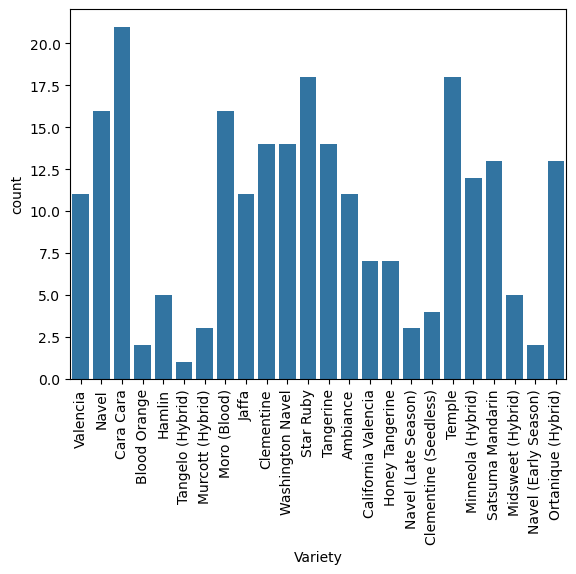

In [23]:
sns.countplot(x="Variety", data=df)
plt.xticks(rotation=90)
plt.show()

(array([49., 53., 57., 49., 33.]),
 array([ 6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 5 artists>)

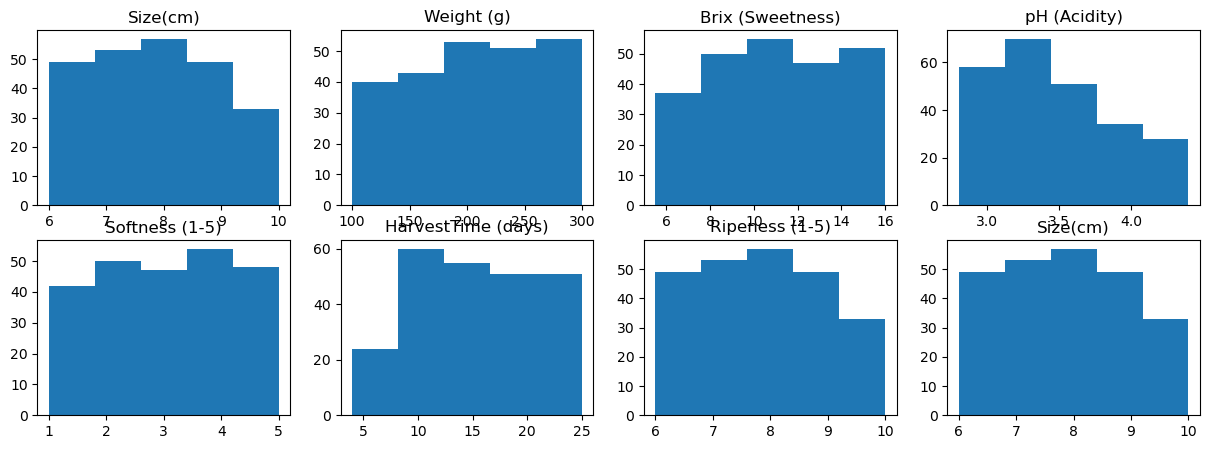

In [45]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

axes[0,0].set_title("Size(cm)")
axes[0,0].hist(df["Size (cm)"], bins=5)

axes[0,1].set_title("Weight (g)")
axes[0,1].hist(df["Weight (g)"], bins=5)

axes[0,2].set_title("Brix (Sweetness)")
axes[0,2].hist(df["Brix (Sweetness)"], bins=5)

axes[0,3].set_title("pH (Acidity)")
axes[0,3].hist(df["pH (Acidity)"], bins=5)

axes[1,0].set_title("Softness (1-5)")
axes[1,0].hist(df["Softness (1-5)"], bins=5)

axes[1,1].set_title("HarvestTime (days)")
axes[1,1].hist(df["HarvestTime (days)"], bins=5)

axes[1,2].set_title("Ripeness (1-5)")
axes[1,2].hist(df["Size (cm)"], bins=5)

axes[1,3].set_title("Size(cm)")
axes[1,3].hist(df["Size (cm)"], bins=5)

In [30]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = label_encoder.fit_transform(df[column])

df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6,4.5


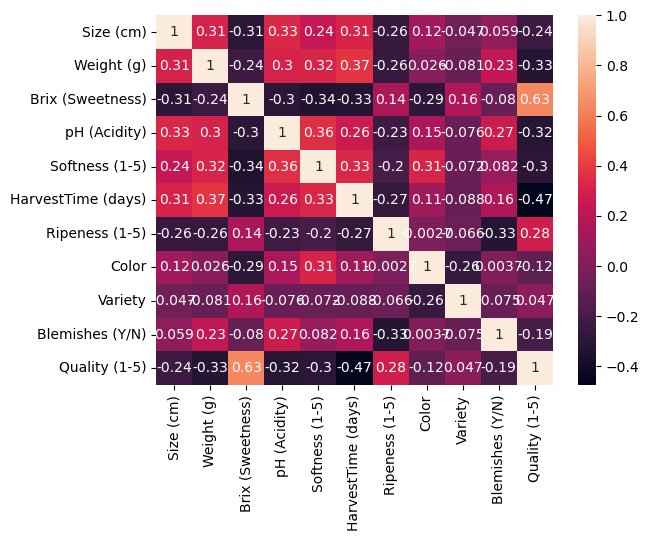

In [46]:
sns.heatmap(df.corr(method="pearson"), annot=True)
plt.show()

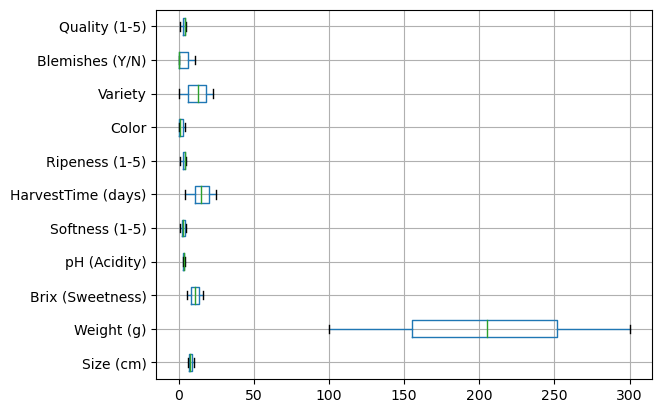

In [29]:
df.boxplot(vert=False)
plt.show()